# Dataset Building

In [1]:
import tweepy
import csv
import string
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from sklearn import model_selection
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [2]:
def splitter(tweet):
    return tweet.split()

# Analysis (Tempat)

In [3]:
df_tempat = pd.read_csv("_dataset/dataset tempat 2022-11-21a.csv")

In [4]:
df_tempat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5478 entries, 0 to 5477
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   created_at     5478 non-null   object
 1   author         5478 non-null   object
 2   cleaned_tweet  5477 non-null   object
 3   category       5478 non-null   object
dtypes: object(4)
memory usage: 171.3+ KB


In [5]:
df_tempat.head(10)

,created_at,author,cleaned_tweet,category
0,2022-11-18 18:40:29+00:00,abcdiloveyouf,nomin college au d dingin mau diangetin saat j...,gunung
1,2022-11-18 18:40:17+00:00,lutfimove,pemagaran dan gapura tpu astana gunung kp nyal...,gunung
2,2022-11-18 18:39:48+00:00,imamtoyib1,promo diskon khans sandal gunung pria wanita l...,gunung
3,2022-11-18 18:38:10+00:00,imjusthumann_,kangen naik gunung,gunung
4,2022-11-18 18:37:25+00:00,UNSfess_,halo mas mbak karanganyar kota atau sekitar be...,gunung
5,2022-11-18 18:36:10+00:00,Noramisah,tmbah lagi jln nk klau gunung tu pon berlubang...,gunung
6,2022-11-18 18:36:00+00:00,imamtoyib1,promo diskon arsy sport sandal gunung pria jep...,gunung
7,2022-11-18 18:35:57+00:00,FacktaWaw,tempat dengan gravitasi terendah ada di gunung...,gunung
8,2022-11-18 18:33:31+00:00,lutfan_mohamad,foto2 yg diambil minggu lalu mengingatkan syai...,gunung
9,2022-11-18 18:33:19+00:00,SeputarInfoo,pada tahun 1980 reinhold messner mendaki punca...,gunung


In [6]:
df_tempat = df_tempat.dropna()

In [7]:
yTargetTempat = df_tempat["category"]
print(yTargetTempat)

0           gunung
1           gunung
2           gunung
3           gunung
4           gunung
           ...    
5473    air terjun
5474    air terjun
5475    air terjun
5476    air terjun
5477    air terjun
Name: category, Length: 5477, dtype: object


In [8]:
# ubah kategori jadi angka
encoder = LabelEncoder()
YTempat = encoder.fit_transform(yTargetTempat)
print(YTempat)
print(YTempat.shape)

[1 1 1 ... 0 0 0]
(5477,)


In [9]:
vectorizerTempat = CountVectorizer(analyzer=splitter).fit(df_tempat["cleaned_tweet"])
xTargetTempat = vectorizerTempat.transform(df_tempat["cleaned_tweet"])
# print(vectorizer.vocabulary_)
print(len(vectorizerTempat.vocabulary_))
print(xTargetTempat.shape)

16578
(5477, 16578)


In [10]:
tfidfTempat = TfidfTransformer()
XTempat = tfidfTempat.fit_transform(xTargetTempat)
print(XTempat.shape)
print(XTempat[10])

(5477, 16578)
  (0, 15326)	0.5917815348881909
  (0, 14673)	0.23652380379172844
  (0, 8335)	0.29146411321649307
  (0, 8168)	0.3123251429786813
  (0, 7265)	0.36080242457878725
  (0, 6207)	0.211069043872398
  (0, 5292)	0.08136588761727821
  (0, 957)	0.2974621000281777
  (0, 636)	0.2928947075195404
  (0, 626)	0.23607802057480995


In [192]:
X_trainTempat, X_testTempat, y_trainTempat, y_testTempat = train_test_split(XTempat, yTargetTempat, test_size=0.2, random_state=15)
print(X_trainTempat.shape)
print(X_testTempat.shape)
print(y_trainTempat.shape)
print(y_testTempat.shape)

(4381, 16578)
(1096, 16578)
(4381,)
(1096,)


In [193]:
NaiveBayesTempat = MultinomialNB().fit(X_trainTempat, np.ravel(y_trainTempat, order="C"))
print(NaiveBayesTempat)

MultinomialNB()


In [194]:
prediction = NaiveBayesTempat.predict(X_testTempat)
accuracies = accuracy_score(y_testTempat, prediction)

print(prediction)
print(accuracies)

['gunung' 'gunung' 'gunung' ... 'gunung' 'gunung' 'gunung']
0.7454379562043796


In [195]:
df_tempat['category'].value_counts()

gunung        2798
pantai        1637
air terjun    1042
Name: category, dtype: int64

In [196]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.utils.multiclass import unique_labels
import seaborn as sns
import matplotlib.pyplot as plt

cf_matrix = confusion_matrix(y_testTempat, prediction)
print(confusion_matrix(y_testTempat, prediction))

[[ 90 123   0]
 [  0 539  10]
 [  0 146 188]]


<AxesSubplot:>

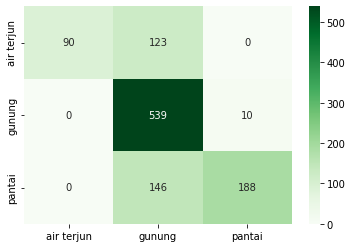

In [197]:
labels = ["air terjun", "gunung", "pantai"]
sns.heatmap(cf_matrix, annot=True, cmap='Greens', fmt="d",
            xticklabels=labels, yticklabels=labels)

In [11]:
X_datasetTempat, y_datasetTempat = XTempat, YTempat

print(X_datasetTempat.shape)
print(y_datasetTempat.shape)

(5477, 16578)
(5477,)


# Analysis (Kegiatan)

In [12]:
df_kegiatan = pd.read_csv("_dataset/dataset kegiatan 2022-11-21a.csv")

In [13]:
df_kegiatan.head()

,created_at,author,cleaned_tweet,category
0,2022-11-18 19:34:16+00:00,PempekJOERAGAN,kuliner pempek paling ajip mantap enaak sekali...,kuliner
1,2022-11-18 19:26:10+00:00,sneakyplankton,kuliner kampus bara dan sekitarnya a thread,kuliner
2,2022-11-18 18:54:36+00:00,rajodurian,rajo durian menyediakan produk kuliner durian ...,kuliner
3,2022-11-18 18:52:25+00:00,Dhotachin,kuliner tanjung duren ternyata banyak juga pis...,kuliner
4,2022-11-18 18:41:15+00:00,rahmat_abdlh,bismillah terima pesanan soto bandung hujan hu...,kuliner


In [14]:
df_kegiatan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6461 entries, 0 to 6460
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   created_at     6461 non-null   object
 1   author         6461 non-null   object
 2   cleaned_tweet  6460 non-null   object
 3   category       6461 non-null   object
dtypes: object(4)
memory usage: 202.0+ KB


In [15]:
df_kegiatan = df_kegiatan.dropna()

In [16]:
yTargetKegiatan = df_kegiatan["category"]
print(yTargetKegiatan)

0       kuliner
1       kuliner
2       kuliner
3       kuliner
4       kuliner
         ...   
6456      kemah
6457      kemah
6458      kemah
6459      kemah
6460      kemah
Name: category, Length: 6460, dtype: object


In [17]:
# ubah kategori jadi angka
encoder = LabelEncoder()
YKegiatan = encoder.fit_transform(yTargetKegiatan)
print(YKegiatan)
print(YKegiatan.shape)
print(YKegiatan[10])

[1 1 1 ... 0 0 0]
(6460,)
1


In [18]:
vectorizerKegiatan = CountVectorizer(analyzer=splitter).fit(df_kegiatan["cleaned_tweet"])
xTargetKegiatan = vectorizerKegiatan.transform(df_kegiatan["cleaned_tweet"])
# print(vectorizer.vocabulary_)
print(len(vectorizerKegiatan.vocabulary_))
print(xTargetKegiatan.shape)

17577
(6460, 17577)


In [19]:
tfidfKegiatan = TfidfTransformer()
XKegiatan = tfidfKegiatan.fit_transform(xTargetKegiatan)
print(XKegiatan.shape)
print(XKegiatan[10])

(6460, 17577)
  (0, 17225)	0.1462443424374383
  (0, 15148)	0.240528662673838
  (0, 13954)	0.2439207626578802
  (0, 13303)	0.279290774882976
  (0, 11320)	0.240528662673838
  (0, 9563)	0.279290774882976
  (0, 9432)	0.279290774882976
  (0, 8483)	0.07711245015424993
  (0, 8385)	0.279290774882976
  (0, 7779)	0.24771280781707444
  (0, 7607)	0.279290774882976
  (0, 6962)	0.17697278336688282
  (0, 5862)	0.21371300972285562
  (0, 5752)	0.23465878868897777
  (0, 4279)	0.240528662673838
  (0, 3609)	0.1366398634024179
  (0, 2478)	0.2439207626578802
  (0, 237)	0.279290774882976


In [177]:
X_trainKegiatan, X_testKegiatan, y_trainKegiatan, y_testKegiatan = train_test_split(XKegiatan, yTargetKegiatan, test_size=0.2, random_state=15)
print(X_trainKegiatan.shape)
print(X_testKegiatan.shape)
print(y_trainKegiatan.shape)
print(y_testKegiatan.shape)

(5168, 17577)
(1292, 17577)
(5168,)
(1292,)


In [178]:
NaiveBayesKegiatan = MultinomialNB().fit(X_trainKegiatan, np.ravel(y_trainKegiatan, order="C"))
print(NaiveBayesTempat)

MultinomialNB()


In [179]:
prediction = NaiveBayesKegiatan.predict(X_testKegiatan)
accuracies = accuracy_score(y_testKegiatan, prediction)

print(prediction)
print(accuracies)

['renang' 'kuliner' 'kuliner' ... 'renang' 'kuliner' 'renang']
0.8335913312693498


In [180]:
df_kegiatan['category'].value_counts()

renang     2880
kuliner    1969
kemah      1611
Name: category, dtype: int64

In [181]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.utils.multiclass import unique_labels
import seaborn as sns
import matplotlib.pyplot as plt

cf_matrix = confusion_matrix(y_testKegiatan, prediction)
print(confusion_matrix(y_testKegiatan, prediction))

[[192  13 136]
 [  1 319  57]
 [  0   8 566]]


<AxesSubplot:>

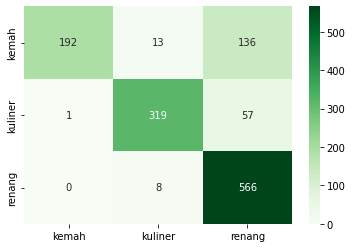

In [182]:
labels = ["kemah", "kuliner", "renang"]
sns.heatmap(cf_matrix, annot=True, cmap='Greens', fmt="d",
            xticklabels=labels, yticklabels=labels)

In [106]:
X_datasetKegiatan, y_datasetKegiatan = XKegiatan, YKegiatan

print(X_datasetKegiatan.shape)
print(y_datasetKegiatan.shape)

(6460, 17577)
(6460,)


## Real User Tweet Implementation

In [20]:
import import_ipynb
from TweetRetrieval import *

importing Jupyter notebook from TweetRetrieval.ipynb
Today: 2022-12-20


In [108]:
# sementara yang real time kita disable dulu ya ges

# path = 'user/'
# username = "rochmanstn"
# filename = path + username + " " + str(date.today()) + ".csv"

# print(filename)
# user_tweet_retriever(filename, username)

In [21]:
import os
user_list = os.listdir("user")
user_list

['Adindathomass 2022-10-19.csv',
 'aliifnrhmn 2022-10-19.csv',
 'dummydunkey 2022-10-19.csv',
 'KatakBotak2 2022-10-19.csv',
 'muhhamadgogo 2022-10-19.csv',
 'rndraadty 2022-10-19.csv',
 'rochmanstn 2022-10-19.csv',
 'sleepywll 2022-10-19.csv']

In [22]:
df_user = pd.read_csv("user/" + user_list[6])
df_user

,created_at,cleaned_tweet
0,2022-10-19 11:21:46+00:00,why why why
1,2022-10-11 14:48:51+00:00,butuh pendengar yang baik
2,2022-10-09 05:45:13+00:00,terobos aja lah bismillah
3,2022-10-07 07:39:56+00:00,kumpulin niatnya vio
4,2022-10-06 07:00:36+00:00,gimana ya ya gimana lagi
...,...,...
175,2014-09-09 10:14:38+00:00,follow buat kamu kamu yang udah punya pacar ha...
176,2014-08-30 15:41:03+00:00,follow buat pasangan2 lo cocok dikasih surepri...
177,2014-08-26 16:30:49+00:00,fun karikatur mulai dari hrga 100 500rb setiap...
178,2014-08-23 13:27:41+00:00,click for your money pocket


In [ ]:
# df_user['cleaned_tweet'] = df_user['tweet'].apply(lambda x: clean_tweet(x))
# df_user['cleaned_tweet'] = df_user['cleaned_tweet'].apply(lambda x: clean_spaces(x))
# df_user

In [ ]:
# df_user.head()

In [ ]:
# for i in range(len(df_user)):
#     if df_user['cleaned_tweet'][i] == '':
#         df_user = df_user.drop(i, axis=0)

In [ ]:
# len(df_user)
# df_user.head()

In [ ]:
# header = ["created_at", "cleaned_tweet"]
# df_user.to_csv(filename, index=False, columns=header)

In [23]:
userTarget = vectorizerTempat.transform(df_user["cleaned_tweet"])
print(userTarget[1])

  (0, 1320)	1
  (0, 2634)	1
  (0, 11626)	1
  (0, 16444)	1


In [24]:
tfidf = TfidfTransformer()
user = tfidfTempat.fit_transform(userTarget)
print(user.shape)
print(user[1])

(180, 16578)
  (0, 16444)	0.34537356911356903
  (0, 11626)	0.593675299623183
  (0, 2634)	0.5499515352720405
  (0, 1320)	0.47520526641337246


In [25]:
probability = NaiveBayesTempat.predict_proba(user)
print(probability)

NameError: name 'NaiveBayesTempat' is not defined

In [135]:
category0 = []
category1 = []
category2 = []
for i in range(len(probability)):
    category0.append(probability[i][0])
    category1.append(probability[i][1])
    category2.append(probability[i][2])

def average(list):
    return sum(list)/len(list)

print("username:", "rochmanstn")
print("Probability of air terjun category: " + str(round(average(category0)*100, 2)) + "%")
print("Probability of gunung category    : " + str(round(average(category1)*100, 2)) + "%")
print("Probability of pantai category    : " + str(round(average(category2)*100, 2)) + "%")

username: rochmanstn
Probability of air terjun category: 12.97%
Probability of gunung category    : 60.69%
Probability of pantai category    : 26.33%


----------------------------------------------------------------------------------

In [136]:
userTarget = vectorizerKegiatan.transform(df_user["cleaned_tweet"])
print(userTarget[1])

  (0, 1375)	1
  (0, 2756)	1
  (0, 17425)	1


In [137]:
tfidf = TfidfTransformer()
user = tfidfKegiatan.fit_transform(userTarget)
print(user.shape)
print(user[1])

(180, 17577)
  (0, 17425)	0.4291929365762027
  (0, 2756)	0.6834203179004206
  (0, 1375)	0.5905337350854597


In [138]:
probability = NaiveBayesKegiatan.predict_proba(user)
print(probability)

[[0.33491715 0.21292067 0.45216218]
 [0.21714709 0.33186941 0.4509835 ]
 [0.14698112 0.20472335 0.64829553]
 [0.22708861 0.26820343 0.50470796]
 [0.13021508 0.16666921 0.70311571]
 [0.24574303 0.30804954 0.44620743]
 [0.26816661 0.21560328 0.51623011]
 [0.24574303 0.30804954 0.44620743]
 [0.28341342 0.28430415 0.43228243]
 [0.12532008 0.42131001 0.45336991]
 [0.16483144 0.16310965 0.6720589 ]
 [0.20171203 0.25122111 0.54706686]
 [0.16889647 0.38212671 0.44897682]
 [0.25719034 0.40179222 0.34101744]
 [0.16273762 0.32945807 0.50780431]
 [0.20166793 0.43498766 0.36334441]
 [0.0579085  0.26739831 0.67469319]
 [0.38311465 0.27835496 0.33853039]
 [0.13030451 0.29360895 0.57608653]
 [0.16264731 0.17319554 0.66415715]
 [0.23239356 0.30725202 0.46035442]
 [0.27922005 0.09227509 0.62850486]
 [0.12385073 0.24168922 0.63446006]
 [0.19980093 0.18510543 0.61509364]
 [0.19989866 0.17546208 0.62463926]
 [0.24574303 0.30804954 0.44620743]
 [0.26359229 0.31826304 0.41814467]
 [0.36788926 0.20514408 0.42

In [140]:
category0 = []
category1 = []
category2 = []
for i in range(len(probability)):
    category0.append(probability[i][0])
    category1.append(probability[i][1])
    category2.append(probability[i][2])

def average(list):
    return sum(list)/len(list)

print("username:", "rochmanstn")
print("Probability of kemah category  : " + str(round(average(category0)*100, 2)) + "%")
print("Probability of kuliner category: " + str(round(average(category1)*100, 2)) + "%")
print("Probability of renang category : " + str(round(average(category2)*100, 2)) + "%")

username: rochmanstn
Probability of kemah category  : 21.44%
Probability of kuliner category: 27.6%
Probability of renang category : 50.97%
